# Integrantes
- Sebastián Ahumada
- Guillermo Cala
- Juan Bernier
- Laura Rojas

# Credit Score Classification





**Descripcion del problema: el puntaje de crédito es una forma instantanea de saber como administras tu crédito en un momento particular del tiempo, bajar la puntuación crediticia es muy fácil, pero subirla es complicado. Dada esta problematica hemos decidido usar un dataset de la informacion crediticia de personas para crear un modelo supervisado de aprendizaje de maquinas que clasifique el puntaje crediticio (bueno, estandar y pobre), y así solucionar la problematica presentada**

#Data


    ID: Representa una identificacion unica de la persona
    Customer_ID: Representa una identificacion unica del cliente
    Month: Representa los meses
    Name: Representa el nombre de la persona
    Age: Representa la edad 
    SSN: Representa el numero de seguridad social
    Occupation: Representa la ocupacion o cargo de la persona
    Annual_Income: Representa el ingreso anual 
    Monthly_Inhand_Salary: Representa el ingreso mensal
    Num_Bank_Accounts: Representa el numero de cuenta bancaria 
    Num_Credit_Card: Representa el numero de la tarjeta de credito
    Interest_Rate: Representa la tasa de interes de la tarjeta de credito
    Num_of_Loan: Representa el numero de prestamos hecho por el banco
    Type_of_Loan: Representa el tipo de prestamo 
    Delay_from_due_date: Representa el tiempo en mora
    Num_of_Delayed_Payment: Representa el numero de pagos atrasados
    Changed_Credit_Limit: Representa el porcentaje de cambio maximo en una tarjeta de credito
    Num_Credit_Inquiries: Representa el numero de consultas a tu historial crediticio
    Credit_Mix: Representa la clasificacion de tipos de tarjetas de credito
    Outstanding_Debt: Representa la deuda remanente
    Credit_Utilization_Ratio: Representa el espectro de ultilizacion de la tarjeta de credito
    Credit_History_Age: Representa la edad crediticia
    Payment_of_Min_Amount: Representa si el monto crediticio minimo fue saldado
    Total_EMI_per_month: Representa el monto EMI crediticio mensual
    Amount_invested_monthly: Representa el monto invertido mensual
    Payment_Behaviour: Representa el comportamiento de pago
    Monthly_Balance: Representa el balance mensual de la cuenta
    Credit_Score: Representa el puntaje crediticio (Poor, Standard, Good)


Bibliotecas utilizadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from numpy import mean
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import warnings

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import keras

from keras.models import Sequential

from keras.layers import Dense

from keras.utils import to_categorical 


%matplotlib inline


# Lectura del Dataset



In [ ]:

training_score=pd.read_csv(r"train.csv")


# Inspeccion de los Datos

In [ ]:
training_score.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Verificamos  que no hay valores nulos en los registros del dataset

In [ ]:
training_score.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:

training_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#Procesamiento de los Datos

En esta parte vamos a ver:
* La distribución de la variable a predecir.
* La creación de una matriz de **Correlación** para inspeccionar posibles variables predictoras que están relacionadas entre sí.
*La conversion de variables tipo categoricas a numericas
La creacion de una grafica de permutacion de importancia para descartar variables que no apoyen a la prediccion del modelo

Ya que los siguientes datos : Occupation , Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour son categoricos de tipo string , se les aplica la tecnica de One Hot enconding para su conversion a tipo numerico y su procesamiento con el resto de datos predictores.


In [ ]:
occupation=pd.get_dummies(training_score['Occupation'])
training_score=training_score.drop('Occupation',axis=1)
training_score=pd.concat([training_score,occupation],axis=1)



creditmix=pd.get_dummies(training_score['Credit_Mix'])
training_score=training_score.drop('Credit_Mix',axis=1)
training_score=pd.concat([training_score,creditmix],axis=1)


paymentmin=pd.get_dummies(training_score['Payment_of_Min_Amount'])
training_score=training_score.drop('Payment_of_Min_Amount',axis=1)
training_score=pd.concat([training_score,paymentmin],axis=1)



paymentb=pd.get_dummies(training_score['Payment_Behaviour'])
training_score=training_score.drop('Payment_Behaviour',axis=1)
training_score=pd.concat([training_score,paymentb],axis=1)


print(training_score.info())
training_score.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                100000 non-null  int64  
 1   Customer_ID                       100000 non-null  int64  
 2   Month                             100000 non-null  int64  
 3   Name                              100000 non-null  object 
 4   Age                               100000 non-null  float64
 5   SSN                               100000 non-null  float64
 6   Annual_Income                     100000 non-null  float64
 7   Monthly_Inhand_Salary             100000 non-null  float64
 8   Num_Bank_Accounts                 100000 non-null  float64
 9   Num_Credit_Card                   100000 non-null  float64
 10  Interest_Rate                     100000 non-null  float64
 11  Num_of_Loan                       100000 non-null  fl

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Standard,NM,No,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0,0,1,0,0,0,1,0,0,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0,0,1,0,0,0,0,1,0,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0,0,1,0,0,0,0,0,1,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0,0,1,0,0,0,0,0,0,1
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Se imprime un resumen de datos  para visualizar como quedaron los datos despues de aplicarle la tecnica de One Hot Encoding.

#Creamos un grafico tipo histograma para previsualizar el metodo a predecir

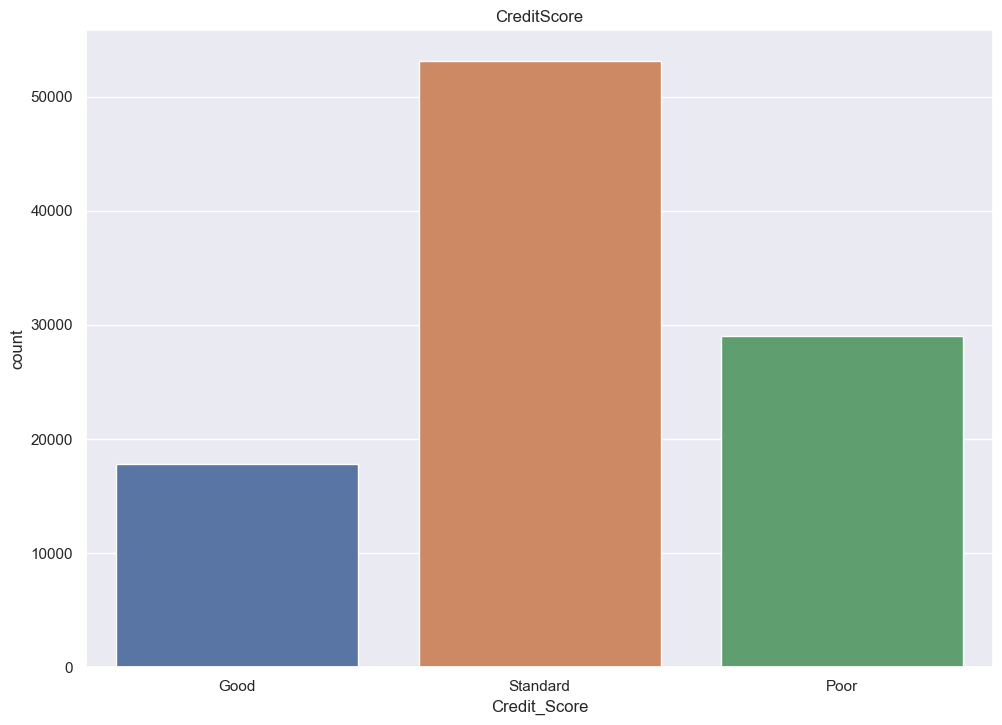

In [ ]:
# Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Credit_Score", data=training_score)
plt.title("CreditScore")
plt.show()


Como podemos ver el el dataset que tenemos acerca de informacion crediticia esta totalmente desbalanceado

**Se aplica la tecnica de RandomUnderSampler de la libreria de sklearn para balancear los datos **

In [ ]:
#Balanceamos Datos
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto')
training_score, Credit_Score = undersample.fit_resample(training_score, training_score["Credit_Score"])

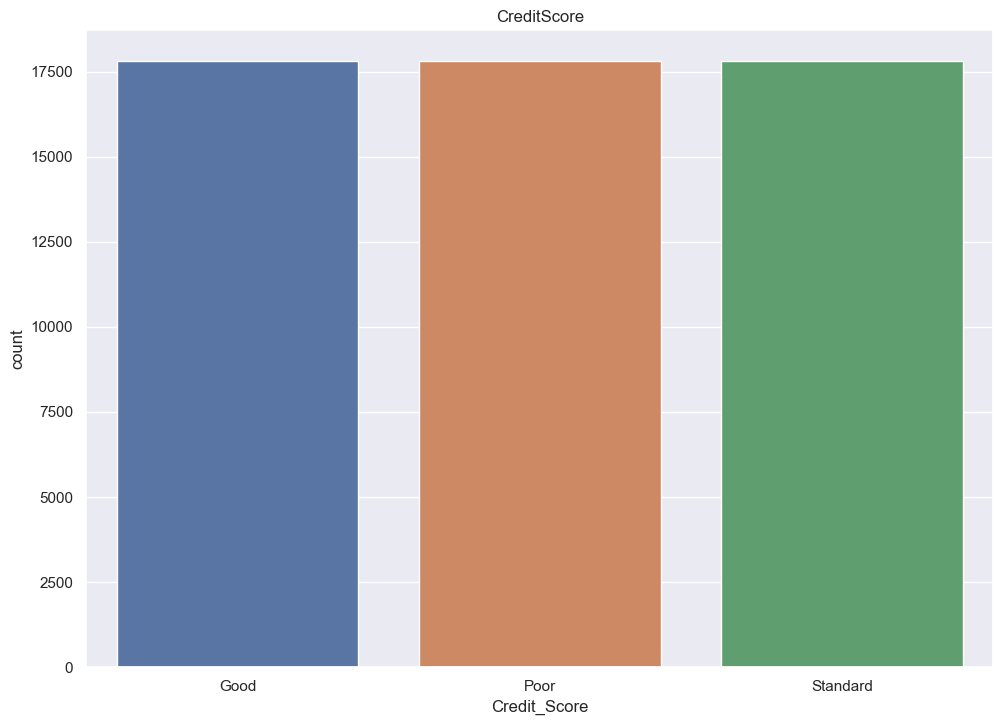

In [ ]:
# Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Credit_Score", data=training_score)
plt.title("CreditScore")
plt.show()


Se muestra el histograma con los datos ya balanceados aplicando la tecnica mencionada anteriormente

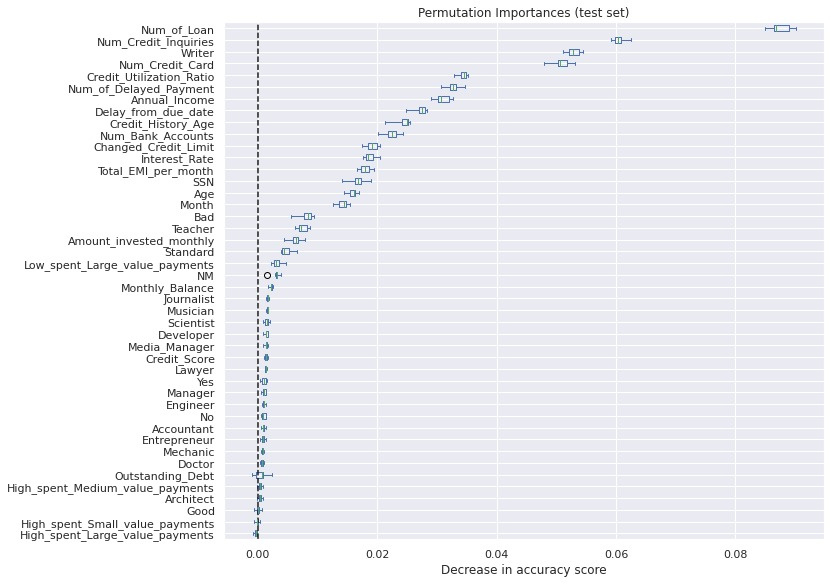

In [ ]:
training_score=training_score.drop('ID',axis=1)
training_score=training_score.drop('Name',axis=1)
training_score=training_score.drop('Customer_ID',axis=1)
training_score=training_score.drop('Monthly_Inhand_Salary',axis=1)
training_score=training_score.drop('Type_of_Loan',axis=1)
training_score=training_score.drop('Num_of_Loan',axis=1)
training_score=training_score.drop('Num_Credit_Inquiries',axis=1)
training_score=training_score.drop('Num_Credit_Card',axis=1)
training_score=training_score.drop('Credit_Utilization_Ratio',axis=1)
training_score=training_score.drop('Annual_Income',axis=1)
training_score=training_score.drop('Delay_from_due_date',axis=1)
training_score=training_score.drop('Credit_History_Age',axis=1)
training_score=training_score.drop('Num_Bank_Accounts',axis=1)
training_score=training_score.drop('Changed_Credit_Limit',axis=1)
training_score=training_score.drop('Total_EMI_per_month',axis=1)
training_score=training_score.drop('SSN',axis=1)
training_score=training_score.drop('Month',axis=1)
training_score=training_score.drop('Age',axis=1)



Se eliminan las variables : ID,Name,Customer_ID,Monthly_Inhand_Salary,Type_of_Loan,Num_of_Loan,'Num_of_Credit_Inquiries',Num_Credit_Card,Num_Credit_Inquiries ,Credit_Utilization_Ratio,Credit_History_Age,Num_Bank_Accounts  ,Changed_Credit_Limit,Total_EMI_per_month ,SSN ,Month.
ya que al aplicar una permutacion de importancias resulto que estas variables no tenian relacion alguna a la hora de dar ayuda a el factor a predecir

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_29144\4097050004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = training_score.corr().round(2)


<AxesSubplot: >

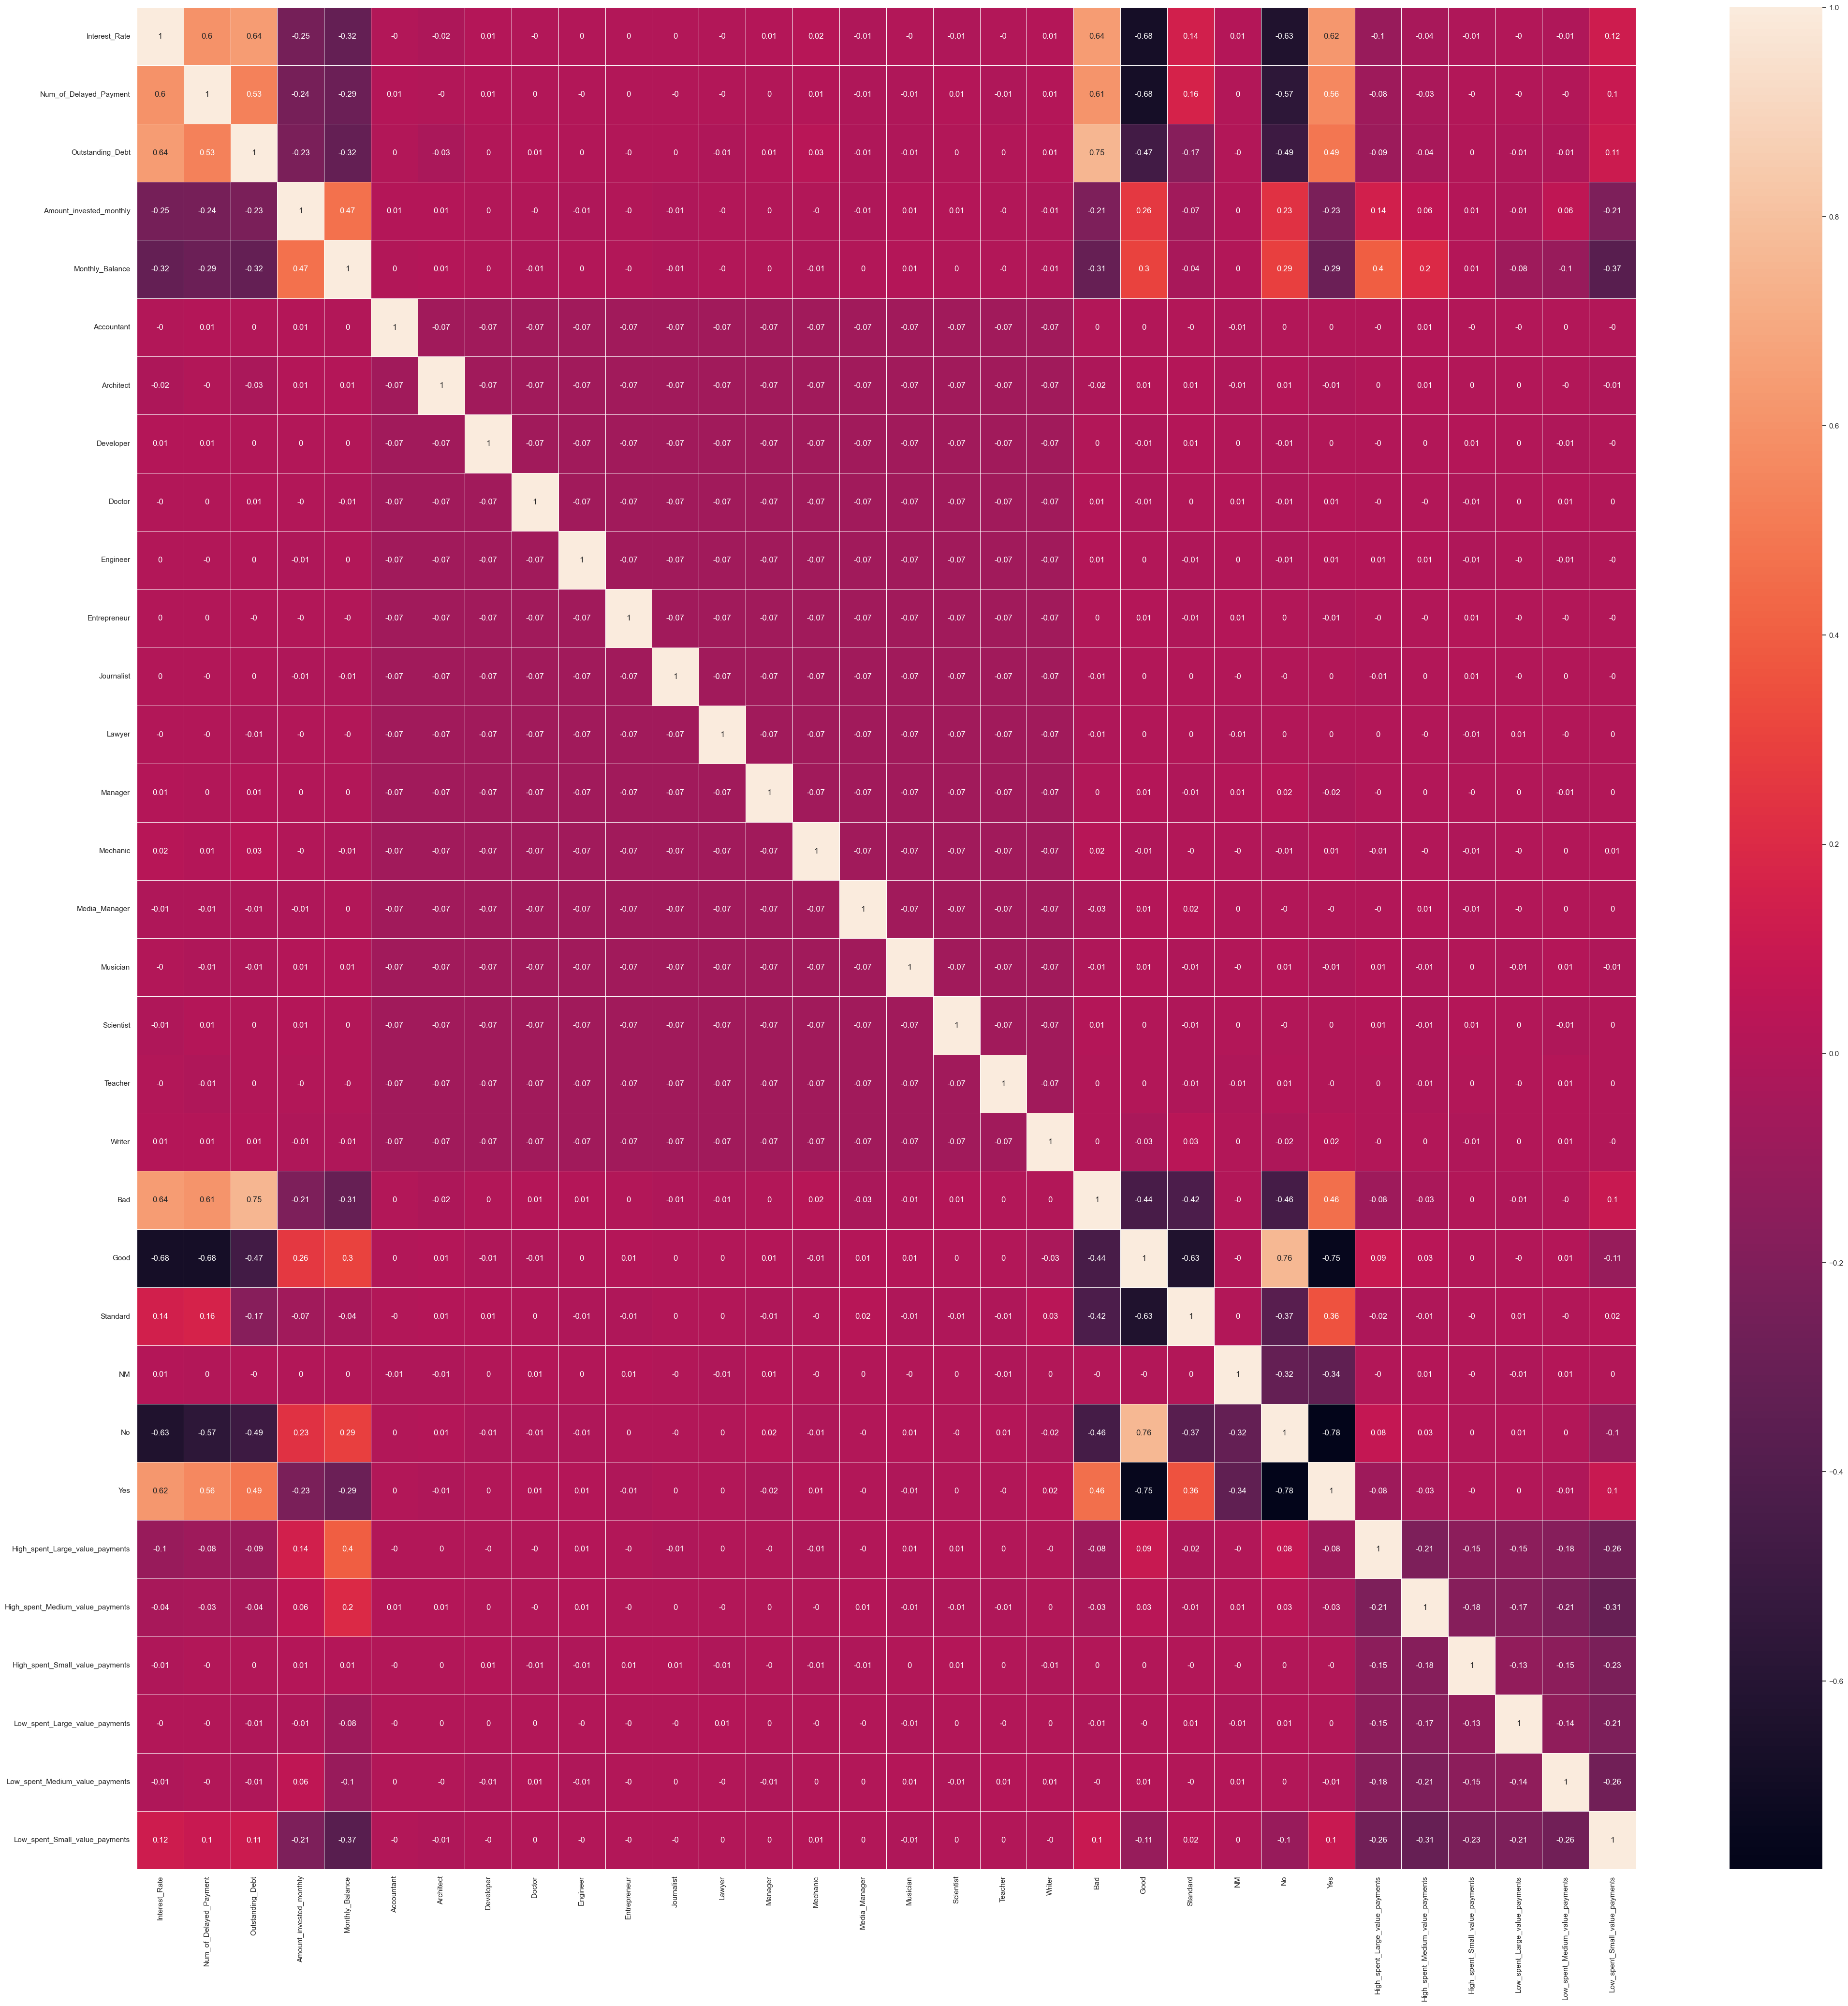

In [ ]:
correlation_matrix = training_score.corr().round(2)
sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(data=correlation_matrix, annot=True, linewidth=.5)

Matriz de correlacion para inspeccionar posibles variables predictoras relacionadas entre si


# Normalizacion de Datos 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(training_score.loc[:, training_score.columns != 'Credit_Score'].values[:, 1:])
y = training_score.loc[:, 'Credit_Score'].values


Se normaliza y se divide el conjunto en variables predictoras (X) y variables a predecir (y)

#Particion del modelo de datos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
print(training_score)

       Interest_Rate  Num_of_Delayed_Payment  Outstanding_Debt  \
0                3.0                     7.0            809.98   
1                3.0                     4.0            809.98   
2                3.0                     7.0            809.98   
3                3.0                     4.0            809.98   
4                3.0                     4.0            809.98   
...              ...                     ...               ...   
53479            9.0                    12.0             62.82   
53480           17.0                    19.0             51.50   
53481            9.0                    11.0            366.87   
53482           19.0                    20.0           3061.73   
53483           18.0                    14.0              4.82   

       Amount_invested_monthly  Monthly_Balance Credit_Score  Accountant  \
0                    21.465380       312.494089         Good           0   
1                    21.465380       284.629162        

In [ ]:
training_score.head()

,Interest_Rate,Num_of_Delayed_Payment,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance,Credit_Score,Accountant,Architect,Developer,Doctor,...,Standard,NM,No,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,3.0,7.0,809.98,21.46538,312.494089,Good,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,3.0,4.0,809.98,21.46538,284.629162,Good,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.0,7.0,809.98,21.46538,331.209863,Good,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3.0,4.0,809.98,21.46538,223.451310,Good,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.0,4.0,809.98,21.46538,341.489231,Good,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
print("Cantidad de ejemplos para entrenamiento: ", len(X_train))
print("Cantidad de ejemplos para prueba: ", len(X_test))

Cantidad de ejemplos para entrenamiento:  42787
Cantidad de ejemplos para prueba:  10697


Respectivas cantidades de datos de prueba y de entrenamiento

# Modelos de entrenamiento

# Arboles de decisión



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_decisionTree = DecisionTreeClassifier()
params_tree = [{ 'criterion' : ['entropy'], 'splitter' : ['best'],  'min_samples_split':[100, 140, 150, 180, 200], 'max_depth' : [30, 50, 100] }]
grid_search = GridSearchCV(model_decisionTree, params_tree, cv=5,  scoring='accuracy')
grid_search.fit(X_train, y_train)

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


Se implementaron los arboles de decisión con un criterio/funcion para medir la calidad de divisiones basada en Shannon information gain, con un disidiente basado en el mejor y nivel máximo del arbol de 20

In [ ]:
print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(X_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

print(classification_report(y_test, y_pred))


Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.70
[[2905  124  536]
 [ 392 2638  526]
 [ 815  795 1966]]
              precision    recall  f1-score   support

        Good       0.71      0.81      0.76      3565
        Poor       0.74      0.74      0.74      3556
    Standard       0.65      0.55      0.60      3576

    accuracy                           0.70     10697
   macro avg       0.70      0.70      0.70     10697
weighted avg       0.70      0.70      0.70     10697



Se presenta una precisión de 70% sobre el conjunto de prueba.
La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 2905 good
- 2638 poor
- 1966 standard

clasificados incorrectamente:
- 124 good fueron clasificados como poor y 536 como standard
- 392 poor fueron clasificados como good y 526 como standard
- 815 standard fueron clasificados como good y 795 como poor

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_estimators=50, max_depth=20)
RFclf.fit(X_train, y_train)

#Evaluación en el conjunto de entrenamiento
y_pred = RFclf.predict(X_train)

print('Accuracy de RandomForestClassifier sobre el conjunto de entrenamiento es: {:.2f}'.format(RFclf.score(X_train, y_train))) 
cmatrix = confusion_matrix(y_train, y_pred)
print(cmatrix)
print(classification_report(y_train, y_pred))

#Evaluación en el conjunto de prueba
y_pred = RFclf.predict(X_test)

print('Accuracy de RandomForestClassifier sobre el conjunto de prueba es: {:.2f}'.format(RFclf.score(X_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
print(classification_report(y_test, y_pred))

Accuracy de RandomForestClassifier sobre el conjunto de entrenamiento es: 0.87
[[13397   137   729]
 [ 1366 12474   432]
 [ 1996   949 11307]]
              precision    recall  f1-score   support

        Good       0.80      0.94      0.86     14263
        Poor       0.92      0.87      0.90     14272
    Standard       0.91      0.79      0.85     14252

    accuracy                           0.87     42787
   macro avg       0.88      0.87      0.87     42787
weighted avg       0.88      0.87      0.87     42787

Accuracy de RandomForestClassifier sobre el conjunto de prueba es: 0.72
[[2993   86  486]
 [ 519 2673  364]
 [ 758  771 2047]]
              precision    recall  f1-score   support

        Good       0.70      0.84      0.76      3565
        Poor       0.76      0.75      0.75      3556
    Standard       0.71      0.57      0.63      3576

    accuracy                           0.72     10697
   macro avg       0.72      0.72      0.72     10697
weighted avg       0.72

En el conjunto de datos de entrenamiento se presenta una precisión de 87%. La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 13397 good
- 12474 poor
- 11307 standard

clasificados incorrectamente:

- 137 good fueron clasificados como poor y 729 como standard
- 1366 poor fueron clasificados como good y 432 como standard
- 1996 standard fueron clasificados como good y 949 como poor

En el conjunto de datos de prueba se presenta una precisión de 72%. La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 2993 good
- 2673 poor
- 2047 standard

clasificados incorrectamente:

- 86 good fueron clasificados como poor y 486 como standard
- 519 poor fueron clasificados como good y 364 como standard
- 758 standard fueron clasificados como good y 771 como poor

In [ ]:
param_grid_Rf=[{'n_estimators':[50, 100],'criterion':['entropy' ,'gini'],'max_depth':[30, 50, 80], 'max_features': ['log2']}]

Ajustando parametros

In [ ]:
RfModel = RandomForestClassifier()
grid_search = GridSearchCV(RfModel, param_grid_Rf, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
y_pred = grid_search.predict(X_test)

print('Accuracy de RandomForestClassifier sobre el conjunto de prueba es: {:.2f}'.format(grid_search.score(X_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
print(classification_report(y_test, y_pred))

Accuracy de RandomForestClassifier sobre el conjunto de prueba es: 0.73
[[2956   97  512]
 [ 429 2692  435]
 [ 708  724 2144]]
              precision    recall  f1-score   support

        Good       0.72      0.83      0.77      3565
        Poor       0.77      0.76      0.76      3556
    Standard       0.69      0.60      0.64      3576

    accuracy                           0.73     10697
   macro avg       0.73      0.73      0.73     10697
weighted avg       0.73      0.73      0.73     10697



Despues de ajustar parametros el conjunto de datos de prueba presenta una precisión de 73%. La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 2956 good
- 2692 poor
- 2144 standard

clasificados incorrectamente:

- 97 good fueron clasificados como poor y 512 como standard
- 429 poor fueron clasificados como good y 435 como standard
- 708 standard fueron clasificados como good y 724 como poor

# Regresion Multinomial

In [ ]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter=300)
softReg.fit(X,y)

LogisticRegression(max_iter=300, multi_class='multinomial')

In [ ]:
softReg.intercept_,softReg.coef_

(array([-0.07282942, -0.11697502,  0.18980445]),
 array([[ 0.24372719, -0.96943485,  0.79849641, -0.70912348, -0.02268988,
         -0.02862566,  0.06647702,  0.06170053,  0.05217664, -0.065015  ,
          0.10862006, -0.01340028, -0.00881448, -0.06249071,  0.02555777,
         -0.0034444 , -0.03374545,  0.00141859, -0.14710214, -1.03409193,
          1.24410135, -0.27938682,  0.06368783,  0.11102199, -0.24408723,
          0.19345794,  0.10237189,  0.03047889, -0.03101668, -0.11058422,
         -0.25408521],
        [ 0.01585372,  1.3268072 , -0.86775987,  0.33384088,  0.05203767,
         -0.02504322, -0.04377118, -0.11535702,  0.00244325,  0.05953004,
         -0.07404136, -0.01223118, -0.01935097,  0.00969945, -0.07723224,
         -0.04265846,  0.04616387,  0.02439369,  0.1033292 ,  0.50313842,
         -0.32090932, -0.29431756,  0.0030425 , -0.41753139,  0.30240042,
         -0.20034853, -0.10525981, -0.06859745, -0.01643202,  0.07955414,
          0.1989952 ],
        [-0.25958

In [ ]:
yhat = softReg.predict(X)
training_score['Credit_Score'] = yhat

In [ ]:
C = confusion_matrix(training_score['Credit_Score'].values,yhat)
confusionMatrix = pd.DataFrame(data = C, index=['poor(0), true','good(1), true','great(2), true'], columns = ['poor(0), predicted','good(1), predicted','great(2), predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"poor(0), predicted","good(1), predicted","great(2), predicted",sum
"poor(0), true",21413,0,0,21413
"good(1), true",0,14027,0,14027
"great(2), true",0,0,18044,18044
sum,21413,14027,18044,53484


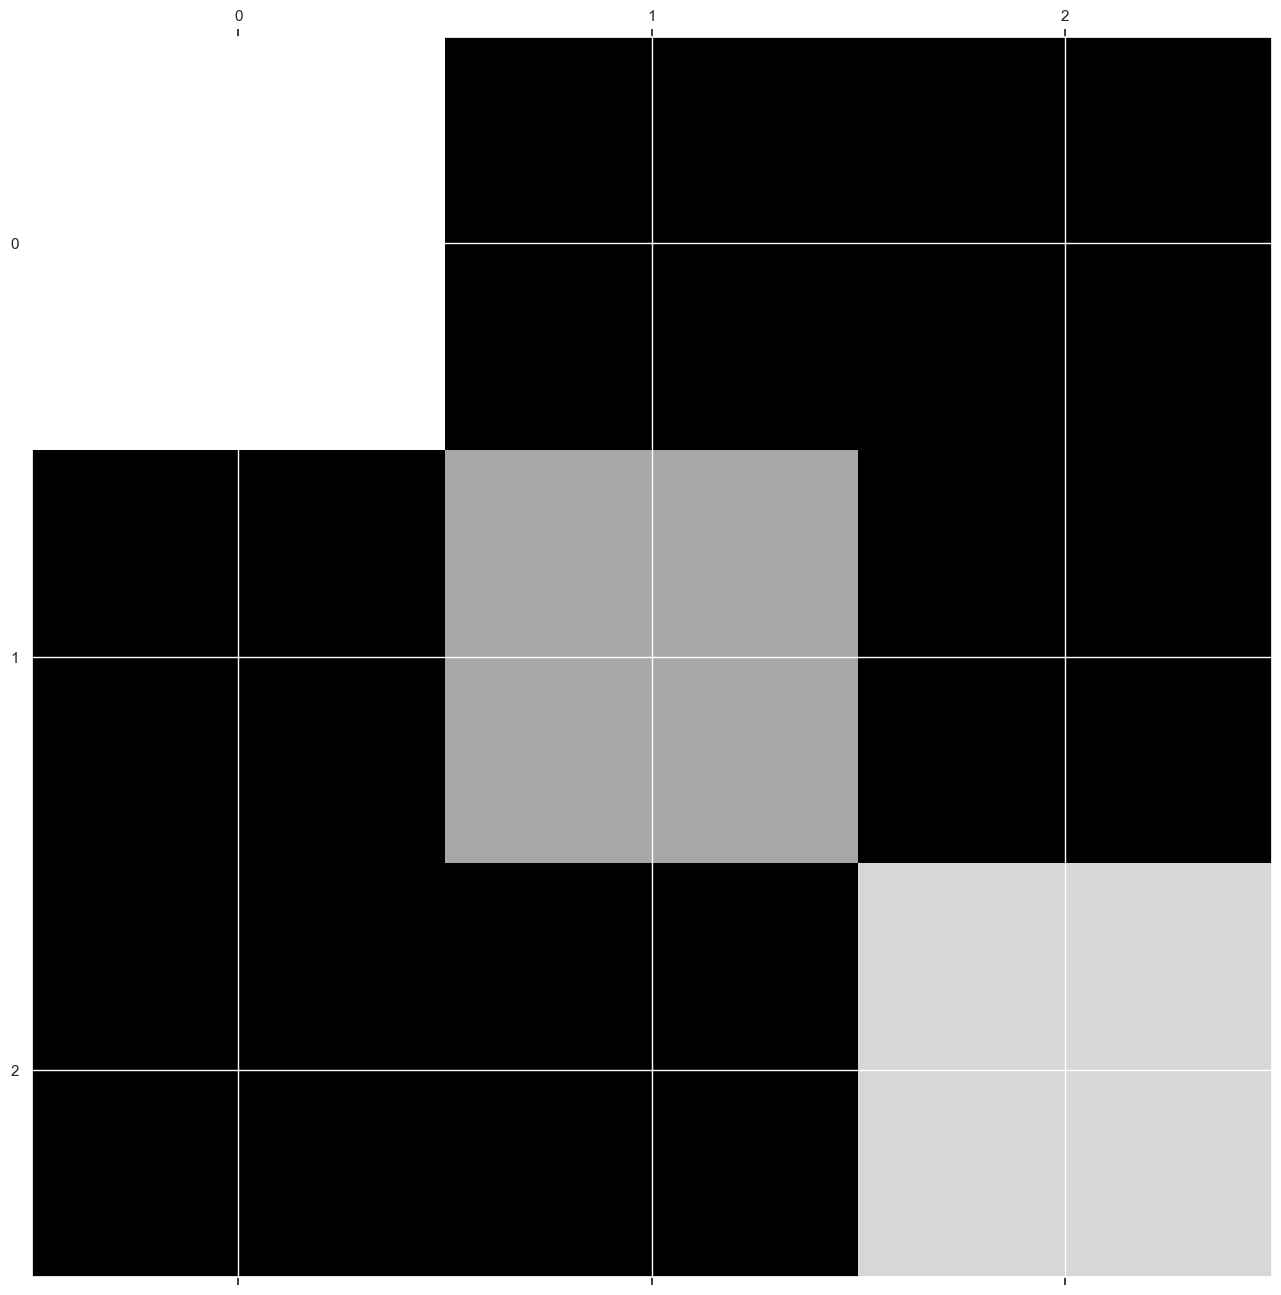

In [ ]:
confMx = confusionMatrix.values[0:3,0:3]
plt.matshow(confMx, cmap=plt.cm.gray)
plt.show()

# Redes Neuronales

In [ ]:
#Como esta es una primera prueba prelimintar coloco esta instrucción para que nos me saque un warning
#debido a que el modelo no alcanza a converger
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

#Entrenando un modelo de red neuronal MLP para clasificación
model =  MLPClassifier(hidden_layer_sizes = (10, 10), 
                       alpha=0.01, 
                       max_iter=1000, 
                       activation='logistic'
                      ) 
model.fit(X_train, y_train) #Training the model

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(10, 10),
              max_iter=1000)

Se implementó con 2 capas ocultas y cada una con 10 neuronas, usando un alpha de 0.01, limitando las iteraciones a 1000 y con una estrategia de activacion de funcion para la capa oculta de logistic la cual hace referencia a la funcion logistica sigmoidea basada en returnar f(x) = 1 / (1 + exp(-x)).

In [ ]:
#Test the model
predictions = model.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

accuracy score: 0.7058053659904646
Confusion matrix:
[[2958  105  502]
 [ 566 2637  353]
 [ 747  874 1955]]


En el conjunto de datos de entrenamiento se presenta una precisión de 70%. La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 2958 good
- 2637 poor
- 1955 standard

clasificados incorrectamente:

- 105 good fueron clasificados como poor y 502 como standard
- 566 poor fueron clasificados como good y 353 como standard
- 747 standard fueron clasificados como good y 874 como poor

In [ ]:
param_grid = [{'hidden_layer_sizes' : [(3,3), (4,4), (5,4)], 'max_iter':[100, 500, 1000]}, 
              {'alpha': [0.0001, 0.001, 0.01, 0.1]}]

Ajustando los parametros para el grid search

In [ ]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [ ]:
predictions = grid_search.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

accuracy score: 0.7061793026082079
Confusion matrix:
[[2958  108  499]
 [ 566 2629  361]
 [ 750  859 1967]]


Despues del grid search   se presenta una precisión de 70%. La matriz de confusión nos muestra lo siguiente.

clasificados correctamente:
- 2958 good
- 2629 poor
- 1967 standard

clasificados incorrectamente:

- 108 good fueron clasificados como poor y 499 como standard
- 566 poor fueron clasificados como good y 361 como standard
- 750 standard fueron clasificados como good y 859 como poor

# CONCLUSIONES



Según las configuraciones y reajustes de los modelos de ML:
- Arboles de decisión: 70%
- Random Forest: 72%
- Regresión Multinomial: 100%
- Redes Neuronales: 70%

Con lo siguiente podemos analizar que el modelo que entrega clasifica de manera más optima es Regresión Multinomial con una tasa de clasificación del 100% 

A futuro se puede mejorar la nivelación de datos ya que se encuentra con un desbalance muy grande, por el cual al usar el metodo sencillo "RandomUnderSampler" pasa de un banco de datos de 100000 a 52500 lo cual nos deja con un deficit de posible exploración bastante importante para explorar configuraciones.